Data Cleaning


In [79]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('/Users/Sam/Downloads/Recipe Reviews and User Feedback Dataset.csv')

# Step 2: Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Step 3: Drop rows with any missing values
df = df.dropna()

# Step 4: Drop duplicate rows
df = df.drop_duplicates()

# Step 5: Retain only the earliest 'created_at' entry for duplicate texts
# within the same 'recipe_number' or 'recipe_code' by the same user
df = df.sort_values(by=['created_at'])  # Sort by 'created_at' in ascending order
df = df.drop_duplicates(subset=['recipe_number', 'recipe_code', 'user_id', 'text'], keep='first')

# Final Overview of Cleaned Data
print("Cleaned Dataset Info:")
df.info()

print("\nCleaned Dataset Preview:")
print(df.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 17878 entries, 544 to 17823
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    17878 non-null  int64 
 1   recipe_code      17878 non-null  int64 
 2   recipe_name      17878 non-null  object
 3   comment_id       17878 non-null  object
 4   user_id          17878 non-null  object
 5   user_name        17878 non-null  object
 6   user_reputation  17878 non-null  int64 
 7   created_at       17878 non-null  int64 
 8   reply_count      17878 non-null  int64 
 9   thumbs_up        17878 non-null  int64 
 10  thumbs_down      17878 non-null  int64 
 11  stars            17878 non-null  int64 
 12  best_score       17878 non-null  int64 
 13  text             17878 non-null  object
dtypes: int64(9), object(5)
memory usage: 2.0+ MB

Cleaned Dataset Preview:
       recipe_number  recipe_code              recipe_name  \
544           

In [80]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
544,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_108956,u_1oKVZzv4THPuCQ2sIogt3sy5uFY,knofflerrocks,1,1613035336,0,0,0,5,100,<p>A favorite of my hubby. He loves the flavor...
14326,68,74724,Chocolate Guinness Cake,sp_aUSaElGf_74724_c_115985,u_1oKVdMwdrvRjIXNElUcpvmOBQSJ,kathydew,1,1613035368,0,0,0,4,100,<p>Any ideas for non-alcoholic substitute for ...
616,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_117943,u_1oKVggQUdGID7oRqTsDfStoLlTg,rockstaralice,1,1613035422,0,0,0,5,100,<p>Awesome!!!!!!!!!!!!!!!!!!!!!!</p>
6645,19,1693,Moist Chocolate Cake,sp_aUSaElGf_1693_c_111069,u_1oKVmxKa8OSdxKfiCCutej4RTXe,Punkyjoe81,1,1613035477,0,0,0,5,100,<p>ABSOLUTELY DELCIOUS! And so easy to make! ...
7752,25,23222,Baked Mushroom Chicken,sp_aUSaElGf_23222_c_122000,u_1oKVmrpQvTsv8GyS1JiA39K9QuI,ryanswife,1,1613035506,0,0,0,4,100,<p>Chicken is tender and very good. One of my ...


In [81]:
df.shape

(17878, 14)

In [82]:
# Reorder columns based on the original order (replace with actual column order)
original_order = ['recipe_number', 'recipe_code', 'recipe_name', 'comment_id', 'user_id', 'user_name', 
                  'user_reputation', 'created_at','reply_count',  'thumbs_up', 'thumbs_down', 
                   'stars', 'text']
df = df[original_order]

print(df.head())


       recipe_number  recipe_code              recipe_name  \
544                1        14299       Creamy White Chili   
14326             68        74724  Chocolate Guinness Cake   
616                1        14299       Creamy White Chili   
6645              19         1693     Moist Chocolate Cake   
7752              25        23222   Baked Mushroom Chicken   

                       comment_id                        user_id  \
544    sp_aUSaElGf_14299_c_108956  u_1oKVZzv4THPuCQ2sIogt3sy5uFY   
14326  sp_aUSaElGf_74724_c_115985  u_1oKVdMwdrvRjIXNElUcpvmOBQSJ   
616    sp_aUSaElGf_14299_c_117943  u_1oKVggQUdGID7oRqTsDfStoLlTg   
6645    sp_aUSaElGf_1693_c_111069  u_1oKVmxKa8OSdxKfiCCutej4RTXe   
7752   sp_aUSaElGf_23222_c_122000  u_1oKVmrpQvTsv8GyS1JiA39K9QuI   

           user_name  user_reputation  created_at  reply_count  thumbs_up  \
544    knofflerrocks                1  1613035336            0          0   
14326       kathydew                1  1613035368            0  

In [83]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,text
544,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_108956,u_1oKVZzv4THPuCQ2sIogt3sy5uFY,knofflerrocks,1,1613035336,0,0,0,5,<p>A favorite of my hubby. He loves the flavor...
14326,68,74724,Chocolate Guinness Cake,sp_aUSaElGf_74724_c_115985,u_1oKVdMwdrvRjIXNElUcpvmOBQSJ,kathydew,1,1613035368,0,0,0,4,<p>Any ideas for non-alcoholic substitute for ...
616,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_117943,u_1oKVggQUdGID7oRqTsDfStoLlTg,rockstaralice,1,1613035422,0,0,0,5,<p>Awesome!!!!!!!!!!!!!!!!!!!!!!</p>
6645,19,1693,Moist Chocolate Cake,sp_aUSaElGf_1693_c_111069,u_1oKVmxKa8OSdxKfiCCutej4RTXe,Punkyjoe81,1,1613035477,0,0,0,5,<p>ABSOLUTELY DELCIOUS! And so easy to make! ...
7752,25,23222,Baked Mushroom Chicken,sp_aUSaElGf_23222_c_122000,u_1oKVmrpQvTsv8GyS1JiA39K9QuI,ryanswife,1,1613035506,0,0,0,4,<p>Chicken is tender and very good. One of my ...


EDA

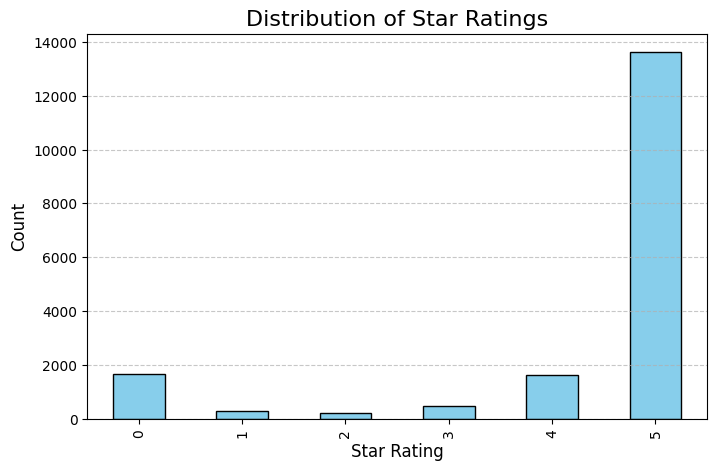

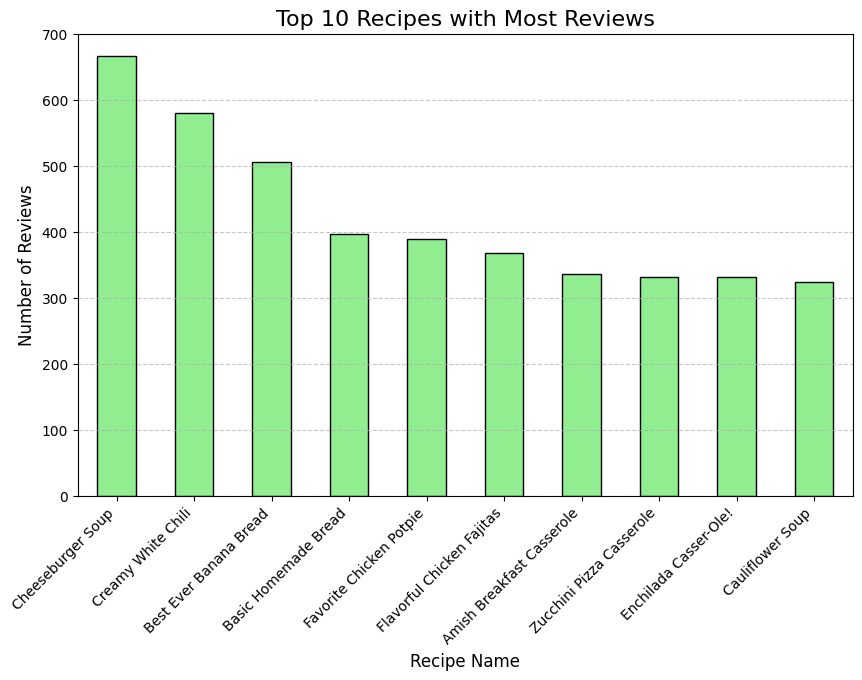

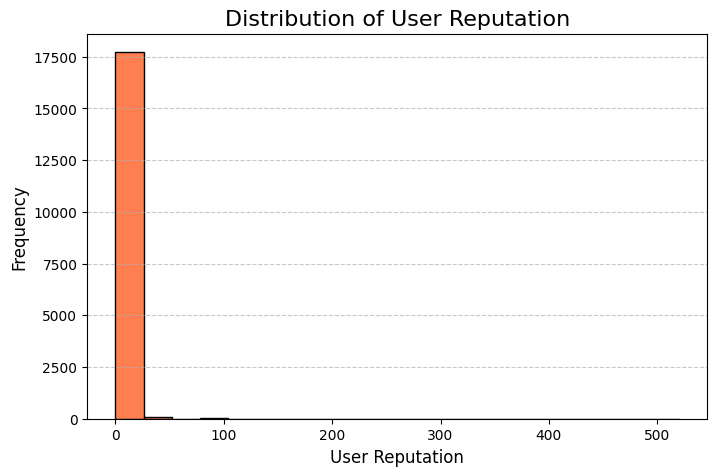

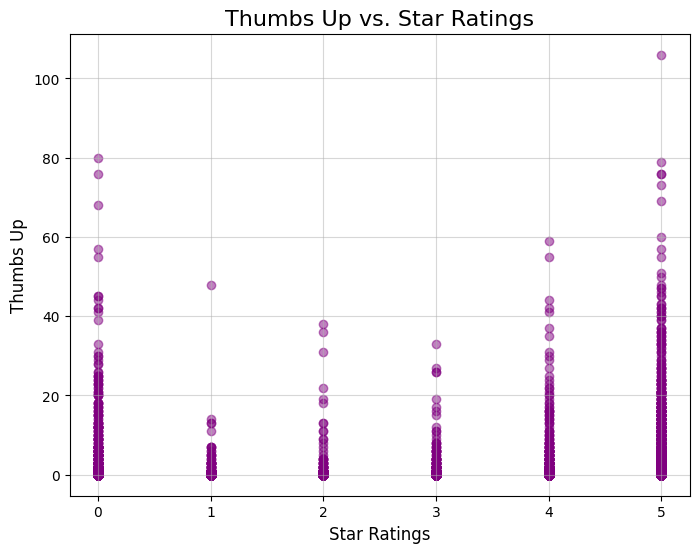

/var/folders/t8/98kc315d6592z5nmcq76rt9h0000gn/T/ipykernel_21535/4068099965.py:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df.set_index('created_at').resample('M').size()


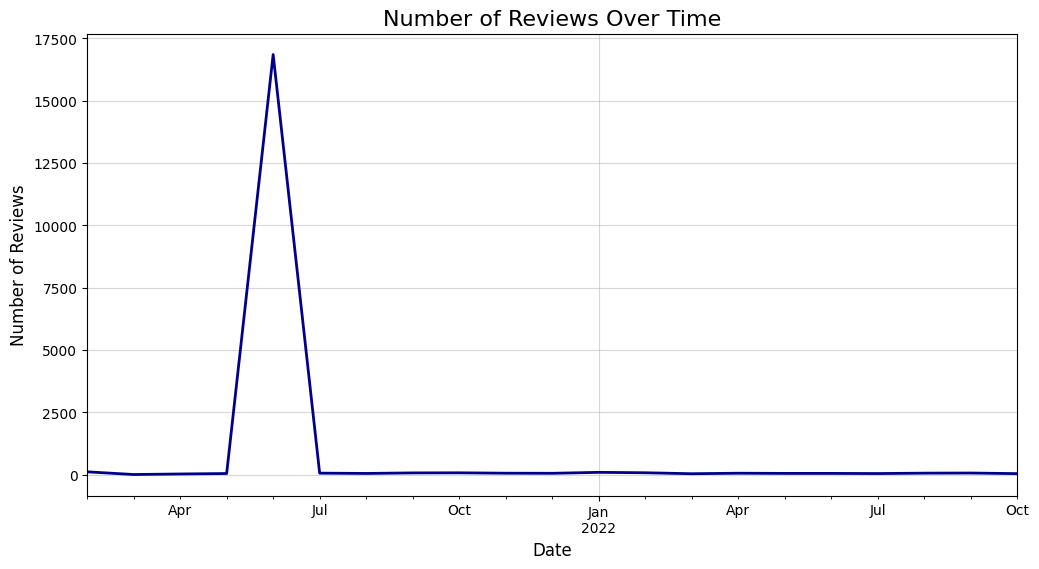

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime column is in correct format for time-based plots
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')

# Example 1: Distribution of star ratings
plt.figure(figsize=(8, 5))
df['stars'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Star Ratings', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Example 2: Top 10 recipes with the most reviews
top_recipes = df['recipe_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_recipes.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Recipes with Most Reviews', fontsize=16)
plt.xlabel('Recipe Name', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Example 3: Distribution of user reputation
plt.figure(figsize=(8, 5))
df['user_reputation'].plot(kind='hist', bins=20, color='coral', edgecolor='black')
plt.title('Distribution of User Reputation', fontsize=16)
plt.xlabel('User Reputation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Example 4: Relationship between thumbs up and star ratings
plt.figure(figsize=(8, 6))
plt.scatter(df['stars'], df['thumbs_up'], alpha=0.5, color='purple')
plt.title('Thumbs Up vs. Star Ratings', fontsize=16)
plt.xlabel('Star Ratings', fontsize=12)
plt.ylabel('Thumbs Up', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Example 5: Time trend of reviews
monthly_reviews = df.set_index('created_at').resample('M').size()
plt.figure(figsize=(12, 6))
monthly_reviews.plot(color='darkblue', linewidth=2)
plt.title('Number of Reviews Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


KNN imputation

In [85]:
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Replace 0 in 'stars' with NaN to mark as missing
df['stars'] = df['stars'].replace(0, np.nan)

# Step 2: Select relevant features for KNN imputation (including recipe_number and recipe_code)
knn_features = df[['recipe_number', 'recipe_code', 'thumbs_up', 'thumbs_down', 'reply_count', 'user_reputation']]

# Step 3: Normalize numeric features to ensure proper scaling for KNN
scaler = MinMaxScaler()
knn_features_scaled = scaler.fit_transform(knn_features)

# Step 4: Add the 'stars' column to the normalized feature set for imputation
knn_features_scaled = np.column_stack((knn_features_scaled, df['stars']))

# Step 5: Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # Use 5 nearest neighbors

# Step 6: Apply KNN imputation
knn_imputed = knn_imputer.fit_transform(knn_features_scaled)

# Step 7: Extract and update 'stars' with imputed values
df['stars'] = knn_imputed[:, -1].round()  # The last column corresponds to 'stars'

# Step 8: Ensure all values are within 1-5
df['stars'] = df['stars'].clip(1, 5).astype(int)

# Final check
print("\nUpdated 'stars' Column After KNN Imputation:")
print(df['stars'].value_counts())




Updated 'stars' Column After KNN Imputation:
stars
5    14917
4     1895
3      545
1      280
2      241
Name: count, dtype: int64


data processing

In [86]:
# import re
# import pandas as pd
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from gensim.models import Word2Vec
# import nltk

# # Download necessary NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

# # Step 1: Drop rows with missing values in the 'text' column
# df = df.dropna(subset=['text'])

# # Step 2: Convert all text to lowercase
# df['text_cleaned'] = df['text'].str.lower()

# # Step 3: Remove punctuation, special characters, and numbers
# df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# # Step 4: Remove extra whitespace
# df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# # Step 5: Remove stopwords
# stop_words = set(stopwords.words('english'))
# df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(
#     [word for word in word_tokenize(x) if word not in stop_words]
# ))

# # Step 6: Perform lemmatization (returns base word while preserving meaning)
# lemmatizer = WordNetLemmatizer()
# df['text_lemmatized'] = df['text_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# # Step 7: Tokenization for Word2Vec
# df['tokens'] = df['text_lemmatized'].apply(word_tokenize)

# # Step 8: Word2Vec Feature Extraction
# # Prepare data for Word2Vec model
# sentences = df['tokens'].tolist()  # List of tokenized sentences

# # Train a Word2Vec model (you can adjust parameters as needed)
# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# # Generate average Word2Vec vectors for each sentence
# def get_avg_word2vec(tokens, model, vector_size):
#     """Calculate the average Word2Vec vector for a list of tokens."""
#     vectors = [model.wv[word] for word in tokens if word in model.wv]
#     if vectors:
#         return sum(vectors) / len(vectors)
#     else:
#         return [0] * vector_size

# df['word2vec_features'] = df['tokens'].apply(lambda x: get_avg_word2vec(x, word2vec_model, 100))

# # Display the cleaned and processed text along with Word2Vec features
# print(df[['text', 'text_cleaned', 'text_lemmatized', 'word2vec_features']].head())


In [87]:
# import pandas as pd
# import numpy as np
# import re
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
# from gensim.models import Word2Vec

# # Ensure NLTK dependencies are downloaded (uncomment if needed)
# # import nltk
# # nltk.download('punkt')
# # nltk.download('wordnet')

# # Step 2: Drop rows with missing values in the 'text' column
# df = df.dropna(subset=['text'])

# # Step 3: Convert all text to lowercase
# df['text'] = df['text'].str.lower()

# # Step 4: Remove punctuation, special characters, and numbers
# df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# # Step 5: Remove extra whitespace
# df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# # Step 6: Remove stopwords
# stopwords = set(ENGLISH_STOP_WORDS)
# df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# # Step 7: Perform lemmatization
# lemmatizer = WordNetLemmatizer()
# df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# # Step 8: Tokenization for Word2Vec
# df['tokens'] = df['text'].apply(word_tokenize)

# # Step 9: Word2Vec Feature Extraction
# word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
# df['word2vec'] = df['tokens'].apply(lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0) if tokens else np.nan)

# # Step 10: Drop rows where Word2Vec feature extraction resulted in NaN
# df = df.dropna(subset=['word2vec'])

# # Model-specific Processing
# # RNN Model: Use 'text' as input feature
# rnn_features = df[['text', 'stars']]

# # AttBiRNN Model: Use 'tokens' as input feature
# attbirnn_features = df[['tokens', 'stars']]

# # CNN+RNN Model: Use 'word2vec' as input feature
# cnn_rnn_features = df[['word2vec', 'stars']]

# # Drop rows where features for each model are empty
# rnn_features = rnn_features.dropna()
# attbirnn_features = attbirnn_features.dropna()
# cnn_rnn_features = cnn_rnn_features.dropna()

# # Final Overview of Processed Features
# print("Processed Features for RNN Model:")
# print(rnn_features.head())

# print("\nProcessed Features for AttBiRNN Model:")
# print(attbirnn_features.head())

# print("\nProcessed Features for CNN+RNN Model:")
# print(cnn_rnn_features.head())


In [88]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec



# Drop rows with missing values in the 'text' column
df = df.dropna(subset=['text'])

# Convert all text to lowercase
df['text'] = df['text'].str.lower()

# Remove punctuation, special characters, and numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Remove extra whitespace
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Remove stopwords
stopwords = set(ENGLISH_STOP_WORDS)
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Perform lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Tokenize the text
df['tokens'] = df['text'].apply(word_tokenize)

# Extract Word2Vec features
word2vec_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
df['word2vec'] = df['tokens'].apply(
    lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv], axis=0)
    if tokens else np.nan
)

# Drop rows where Word2Vec features are missing
df = df.dropna(subset=['word2vec'])

# Prepare datasets for each model
rnn_features = df[['text', 'stars']]
attbirnn_features = df[['tokens', 'stars']]
cnn_rnn_features = df[['word2vec', 'stars']]


In [89]:
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,text,tokens,word2vec
544,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_108956,u_1oKVZzv4THPuCQ2sIogt3sy5uFY,knofflerrocks,1,2021-02-11 09:22:16,0,0,0,5,pa favorite hubby love flavor ip,"[pa, favorite, hubby, love, flavor, ip]","[-0.22330232, 0.7016626, -0.15925957, -0.45147..."
14326,68,74724,Chocolate Guinness Cake,sp_aUSaElGf_74724_c_115985,u_1oKVdMwdrvRjIXNElUcpvmOBQSJ,kathydew,1,2021-02-11 09:22:48,0,0,0,4,pany idea nonalcoholic substitute beer recipep,"[pany, idea, nonalcoholic, substitute, beer, r...","[0.054195534, 0.13494699, 0.023542443, 0.00737..."
616,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_117943,u_1oKVggQUdGID7oRqTsDfStoLlTg,rockstaralice,1,2021-02-11 09:23:42,0,0,0,5,pawesomep,[pawesomep],"[0.009527191, 0.009396954, -0.0052711, -0.0023..."
6645,19,1693,Moist Chocolate Cake,sp_aUSaElGf_1693_c_111069,u_1oKVmxKa8OSdxKfiCCutej4RTXe,Punkyjoe81,1,2021-02-11 09:24:37,0,0,0,5,pabsolutely delcious easy make just afternoon ...,"[pabsolutely, delcious, easy, make, just, afte...","[-0.1815212, 0.48767838, 0.028777877, -0.07872..."
7752,25,23222,Baked Mushroom Chicken,sp_aUSaElGf_23222_c_122000,u_1oKVmrpQvTsv8GyS1JiA39K9QuI,ryanswife,1,2021-02-11 09:25:06,0,0,0,4,pchicken tender good favorite mom make asked r...,"[pchicken, tender, good, favorite, mom, make, ...","[-0.20158353, 0.61737263, -0.07567444, -0.1931..."


In [90]:
df.shape

(17863, 15)

Model Runnning

In [91]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, MaxPooling1D, Input, Reshape, Flatten
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import tensorflow.keras.backend as K


# # Custom F1-score metric for Keras
# def f1_metric(y_true, y_pred):
#     y_pred = K.round(y_pred)
#     tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
#     fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

#     precision = tp / (tp + fp + K.epsilon())
#     recall = tp / (tp + fn + K.epsilon())
#     f1 = 2 * precision * recall / (precision + recall + K.epsilon())
#     return K.mean(f1)


# # Convert labels to one-hot encoding
# def prepare_labels(y):
#     return tf.keras.utils.to_categorical(y - 1, num_classes=5)


# # Prepare data for the RNN model
# tokenizer_rnn = tf.keras.preprocessing.text.Tokenizer()
# tokenizer_rnn.fit_on_texts(rnn_features['text'])
# rnn_sequences = pad_sequences(tokenizer_rnn.texts_to_sequences(rnn_features['text']), padding='post')
# rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test = train_test_split(rnn_sequences, prepare_labels(rnn_features['stars']), test_size=0.2)

# # Prepare data for the AttBiRNN model
# tokenizer_attbirnn = tf.keras.preprocessing.text.Tokenizer()
# tokenizer_attbirnn.fit_on_texts([' '.join(tokens) for tokens in attbirnn_features['tokens']])
# attbirnn_sequences = pad_sequences(tokenizer_attbirnn.texts_to_sequences([' '.join(tokens) for tokens in attbirnn_features['tokens']]), padding='post')
# attbirnn_X_train, attbirnn_X_test, attbirnn_y_train, attbirnn_y_test = train_test_split(attbirnn_sequences, prepare_labels(attbirnn_features['stars']), test_size=0.2)

# # Prepare data for the CNN+RNN model
# cnn_rnn_X_train, cnn_rnn_X_test, cnn_rnn_y_train, cnn_rnn_y_test = train_test_split(
#     np.vstack(cnn_rnn_features['word2vec'].values), prepare_labels(cnn_rnn_features['stars']), test_size=0.2
# )


# # Train and evaluate a model
# def train_and_evaluate(model, X_train, X_test, y_train, y_test):
#     # Train the model
#     model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
#     # Predict class probabilities
#     preds = model.predict(X_test).argmax(axis=1)
#     y_true = y_test.argmax(axis=1)
#     # Compute metrics without averaging
#     metrics = {
#         'accuracy': accuracy_score(y_true, preds),
#         'f1': f1_score(y_true, preds, average=None).tolist(),  # Class-wise F1
#         'precision': precision_score(y_true, preds, average=None).tolist(),  # Class-wise precision
#         'recall': recall_score(y_true, preds, average=None).tolist(),  # Class-wise recall
#     }
#     return metrics


# # Build the RNN model
# def build_rnn_model(input_length, vocab_size):
#     model = Sequential([
#         Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length),
#         LSTM(64),
#         Dense(5, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
#     return model


# # Build the AttBiRNN model
# def build_attbirnn_model(input_length, vocab_size):
#     model = Sequential([
#         Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length),
#         Bidirectional(LSTM(64)),
#         Dense(5, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
#     return model


# # Build the CNN+RNN model (Fixed version)
# def build_cnn_rnn_model(input_shape):
#     inputs = Input(shape=(input_shape,))
#     x = Reshape((input_shape, 1))(inputs)  # Reshape input directly to (timesteps, features)
#     x = Conv1D(64, kernel_size=3, activation='relu')(x)  # Apply 1D convolution
#     x = MaxPooling1D(pool_size=2)(x)  # Apply max pooling
#     x = LSTM(64)(x)  # LSTM layer for sequence processing
#     outputs = Dense(5, activation='softmax')(x)  # Output layer with 5 classes
#     model = Model(inputs, outputs)
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
#     return model


# # Train and evaluate the RNN model
# rnn_model = build_rnn_model(rnn_X_train.shape[1], len(tokenizer_rnn.word_index) + 1)
# rnn_metrics = train_and_evaluate(rnn_model, rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test)

# # Train and evaluate the AttBiRNN model
# attbirnn_model = build_attbirnn_model(attbirnn_X_train.shape[1], len(tokenizer_attbirnn.word_index) + 1)
# attbirnn_metrics = train_and_evaluate(attbirnn_model, attbirnn_X_train, attbirnn_X_test, attbirnn_y_train, attbirnn_y_test)

# # Train and evaluate the CNN+RNN model
# cnn_rnn_model = build_cnn_rnn_model(cnn_rnn_X_train.shape[1])
# cnn_rnn_metrics = train_and_evaluate(cnn_rnn_model, cnn_rnn_X_train, cnn_rnn_X_test, cnn_rnn_y_train, cnn_rnn_y_test)

# # Compare results
# results = pd.DataFrame([rnn_metrics, attbirnn_metrics, cnn_rnn_metrics], index=['RNN', 'AttBiRNN', 'CNN+RNN'])
# print(results)

# # Visualize the results
# results.plot(kind='bar', figsize=(10, 6))
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xlabel('Model')
# plt.legend(loc='best')
# plt.show()


In [92]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, MaxPooling1D, Input, Reshape, Flatten
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import tensorflow.keras.backend as K


# # Custom F1-score metric for Keras
# def f1_metric(y_true, y_pred):
#     y_pred = K.round(y_pred)
#     tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
#     fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
#     fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

#     precision = tp / (tp + fp + K.epsilon())
#     recall = tp / (tp + fn + K.epsilon())
#     f1 = 2 * precision * recall / (precision + recall + K.epsilon())
#     return K.mean(f1)


# # Convert labels to one-hot encoding
# def prepare_labels(y):
#     return tf.keras.utils.to_categorical(y - 1, num_classes=5)


# # Prepare data for the RNN model
# tokenizer_rnn = tf.keras.preprocessing.text.Tokenizer()
# tokenizer_rnn.fit_on_texts(rnn_features['text'])
# rnn_sequences = pad_sequences(tokenizer_rnn.texts_to_sequences(rnn_features['text']), padding='post')
# rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test = train_test_split(rnn_sequences, prepare_labels(rnn_features['stars']), test_size=0.2)

# # Prepare data for the AttBiRNN model
# tokenizer_attbirnn = tf.keras.preprocessing.text.Tokenizer()
# tokenizer_attbirnn.fit_on_texts([' '.join(tokens) for tokens in attbirnn_features['tokens']])
# attbirnn_sequences = pad_sequences(tokenizer_attbirnn.texts_to_sequences([' '.join(tokens) for tokens in attbirnn_features['tokens']]), padding='post')
# attbirnn_X_train, attbirnn_X_test, attbirnn_y_train, attbirnn_y_test = train_test_split(attbirnn_sequences, prepare_labels(attbirnn_features['stars']), test_size=0.2)

# # Prepare data for the CNN+RNN model
# cnn_rnn_X_train, cnn_rnn_X_test, cnn_rnn_y_train, cnn_rnn_y_test = train_test_split(
#     np.vstack(cnn_rnn_features['word2vec'].values), prepare_labels(cnn_rnn_features['stars']), test_size=0.2
# )


# # Train and evaluate a model
# def train_and_evaluate(model, X_train, X_test, y_train, y_test):
#     # Train the model
#     model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
#     # Predict class probabilities
#     preds = model.predict(X_test).argmax(axis=1)
#     y_true = y_test.argmax(axis=1)
#     # Compute metrics without averaging
#     metrics = {
#         'accuracy': accuracy_score(y_true, preds),
#         'f1': f1_score(y_true, preds, average='weighted'),  # Weighted F1
#         'precision': precision_score(y_true, preds, average='weighted'),  # Weighted precision
#         'recall': recall_score(y_true, preds, average='weighted'),  # Weighted recall
#     }
#     return metrics


# # Build the RNN model
# def build_rnn_model(input_length, vocab_size):
#     model = Sequential([
#         Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length),
#         LSTM(64),
#         Dense(5, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
#     return model


# # Build the AttBiRNN model
# def build_attbirnn_model(input_length, vocab_size):
#     model = Sequential([
#         Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length),
#         Bidirectional(LSTM(64)),
#         Dense(5, activation='softmax')
#     ])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
#     return model


# # Build the CNN+RNN model
# def build_cnn_rnn_model(input_shape):
#     inputs = Input(shape=(input_shape,))
#     x = Reshape((input_shape, 1))(inputs)  # Reshape input directly to (timesteps, features)
#     x = Conv1D(64, kernel_size=3, activation='relu')(x)  # Apply 1D convolution
#     x = MaxPooling1D(pool_size=2)(x)  # Apply max pooling
#     x = LSTM(64)(x)  # LSTM layer for sequence processing
#     outputs = Dense(5, activation='softmax')(x)  # Output layer with 5 classes
#     model = Model(inputs, outputs)
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
#     return model


# # Train and evaluate the RNN model
# rnn_model = build_rnn_model(rnn_X_train.shape[1], len(tokenizer_rnn.word_index) + 1)
# rnn_metrics = train_and_evaluate(rnn_model, rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test)

# # Train and evaluate the AttBiRNN model
# attbirnn_model = build_attbirnn_model(attbirnn_X_train.shape[1], len(tokenizer_attbirnn.word_index) + 1)
# attbirnn_metrics = train_and_evaluate(attbirnn_model, attbirnn_X_train, attbirnn_X_test, attbirnn_y_train, attbirnn_y_test)

# # Train and evaluate the CNN+RNN model
# cnn_rnn_model = build_cnn_rnn_model(cnn_rnn_X_train.shape[1])
# cnn_rnn_metrics = train_and_evaluate(cnn_rnn_model, cnn_rnn_X_train, cnn_rnn_X_test, cnn_rnn_y_train, cnn_rnn_y_test)

# # Combine metrics into a single DataFrame
# results = pd.DataFrame({
#     'RNN': rnn_metrics,
#     'AttBiRNN': attbirnn_metrics,
#     'CNN+RNN': cnn_rnn_metrics
# }).T

# print(results)

# # Plot the metrics for comparison
# results.plot(kind='bar', figsize=(10, 6))
# plt.title('Model Performance Comparison')
# plt.ylabel('Score')
# plt.xlabel('Model')
# plt.legend(loc='best')
# plt.show()


Epoch 1/5


/Users/sam/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


402/402 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - f1_metric: 0.1664 - loss: 0.6869 - val_f1_metric: 0.1820 - val_loss: 0.6067
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - f1_metric: 0.1816 - loss: 0.6233 - val_f1_metric: 0.1820 - val_loss: 0.6065
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - f1_metric: 0.1814 - loss: 0.6248 - val_f1_metric: 0.1820 - val_loss: 0.6075
Epoch 4/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - f1_metric: 0.1811 - loss: 0.6300 - val_f1_metric: 0.1820 - val_loss: 0.6072
Epoch 5/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - f1_metric: 0.1823 - loss: 0.6017 - val_f1_metric: 0.1820 - val_loss: 0.6078
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Epoch 1/5


/Users/sam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sam/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - f1_metric: 0.1667 - loss: 0.6591 - val_f1_metric: 0.1810 - val_loss: 0.5378
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - f1_metric: 0.1890 - loss: 0.4319 - val_f1_metric: 0.1993 - val_loss: 0.5271
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - f1_metric: 0.2586 - loss: 0.3633 - val_f1_metric: 0.2213 - val_loss: 0.5701
Epoch 4/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - f1_metric: 0.3625 - loss: 0.2933 - val_f1_metric: 0.2373 - val_loss: 0.5976
Epoch 5/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - f1_metric: 0.4248 - loss: 0.2277 - val_f1_metric: 0.2713 - val_loss: 0.6525
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Epoch 1/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - f1_metric: 0.1616 - loss: 0.7135 - val_f1_metric: 0.1805 - val_loss: 0.5965
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1_metric: 0.1821 - loss: 0.5773 - val_f1_metric: 0.1808 - val_loss: 0.5825
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - f1

/Users/sam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


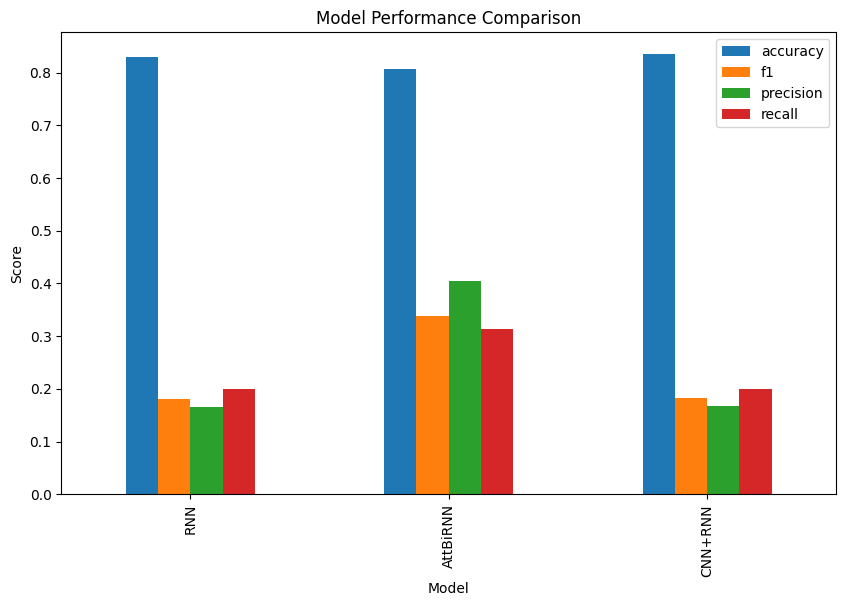

In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, MaxPooling1D, Input, Reshape, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras.backend as K


# Custom F1-score metric for Keras
def f1_metric(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)


# Convert labels to one-hot encoding
def prepare_labels(y):
    return tf.keras.utils.to_categorical(y - 1, num_classes=5)


# Prepare data for the RNN model
tokenizer_rnn = tf.keras.preprocessing.text.Tokenizer()
tokenizer_rnn.fit_on_texts(rnn_features['text'])
rnn_sequences = pad_sequences(tokenizer_rnn.texts_to_sequences(rnn_features['text']), padding='post')
rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test = train_test_split(rnn_sequences, prepare_labels(rnn_features['stars']), test_size=0.2)

# Prepare data for the AttBiRNN model
tokenizer_attbirnn = tf.keras.preprocessing.text.Tokenizer()
tokenizer_attbirnn.fit_on_texts([' '.join(tokens) for tokens in attbirnn_features['tokens']])
attbirnn_sequences = pad_sequences(tokenizer_attbirnn.texts_to_sequences([' '.join(tokens) for tokens in attbirnn_features['tokens']]), padding='post')
attbirnn_X_train, attbirnn_X_test, attbirnn_y_train, attbirnn_y_test = train_test_split(attbirnn_sequences, prepare_labels(attbirnn_features['stars']), test_size=0.2)

# Prepare data for the CNN+RNN model
cnn_rnn_X_train, cnn_rnn_X_test, cnn_rnn_y_train, cnn_rnn_y_test = train_test_split(
    np.vstack(cnn_rnn_features['word2vec'].values), prepare_labels(cnn_rnn_features['stars']), test_size=0.2
)


# Train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)
    # Predict class probabilities
    preds = model.predict(X_test).argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    # Compute metrics without averaging
    metrics = {
        'accuracy': accuracy_score(y_true, preds),
        'f1': np.mean(f1_score(y_true, preds, average=None)),  # Mean F1 across all classes
        'precision': np.mean(precision_score(y_true, preds, average=None)),  # Mean precision across all classes
        'recall': np.mean(recall_score(y_true, preds, average=None))  # Mean recall across all classes
    }
    return metrics


# Build the RNN model
def build_rnn_model(input_length, vocab_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length),
        LSTM(64),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
    return model


# Build the AttBiRNN model
def build_attbirnn_model(input_length, vocab_size):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=100, input_length=input_length),
        Bidirectional(LSTM(64)),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
    return model


# Build the CNN+RNN model
def build_cnn_rnn_model(input_shape):
    inputs = Input(shape=(input_shape,))
    x = Reshape((input_shape, 1))(inputs)  # Reshape input directly to (timesteps, features)
    x = Conv1D(64, kernel_size=3, activation='relu')(x)  # Apply 1D convolution
    x = MaxPooling1D(pool_size=2)(x)  # Apply max pooling
    x = LSTM(64)(x)  # LSTM layer for sequence processing
    outputs = Dense(5, activation='softmax')(x)  # Output layer with 5 classes
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[f1_metric])
    return model


# Train and evaluate the RNN model
rnn_model = build_rnn_model(rnn_X_train.shape[1], len(tokenizer_rnn.word_index) + 1)
rnn_metrics = train_and_evaluate(rnn_model, rnn_X_train, rnn_X_test, rnn_y_train, rnn_y_test)

# Train and evaluate the AttBiRNN model
attbirnn_model = build_attbirnn_model(attbirnn_X_train.shape[1], len(tokenizer_attbirnn.word_index) + 1)
attbirnn_metrics = train_and_evaluate(attbirnn_model, attbirnn_X_train, attbirnn_X_test, attbirnn_y_train, attbirnn_y_test)

# Train and evaluate the CNN+RNN model
cnn_rnn_model = build_cnn_rnn_model(cnn_rnn_X_train.shape[1])
cnn_rnn_metrics = train_and_evaluate(cnn_rnn_model, cnn_rnn_X_train, cnn_rnn_X_test, cnn_rnn_y_train, cnn_rnn_y_test)

# Combine metrics into a single DataFrame
results = pd.DataFrame({
    'RNN': rnn_metrics,
    'AttBiRNN': attbirnn_metrics,
    'CNN+RNN': cnn_rnn_metrics
}).T

print(results)

# Plot the metrics for comparison
results.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='best')
plt.show()


Model Tuning

In [94]:
pip install keras-tuner


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 129 kB 3.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
